In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img=cv2.imread('car_plate.jpg')

In [8]:
def display(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #scope of this img is only this function
    fig = plt.figure(figsize=(17,20))
    ax = fig.add_subplot(111)
    ax.imshow(img)

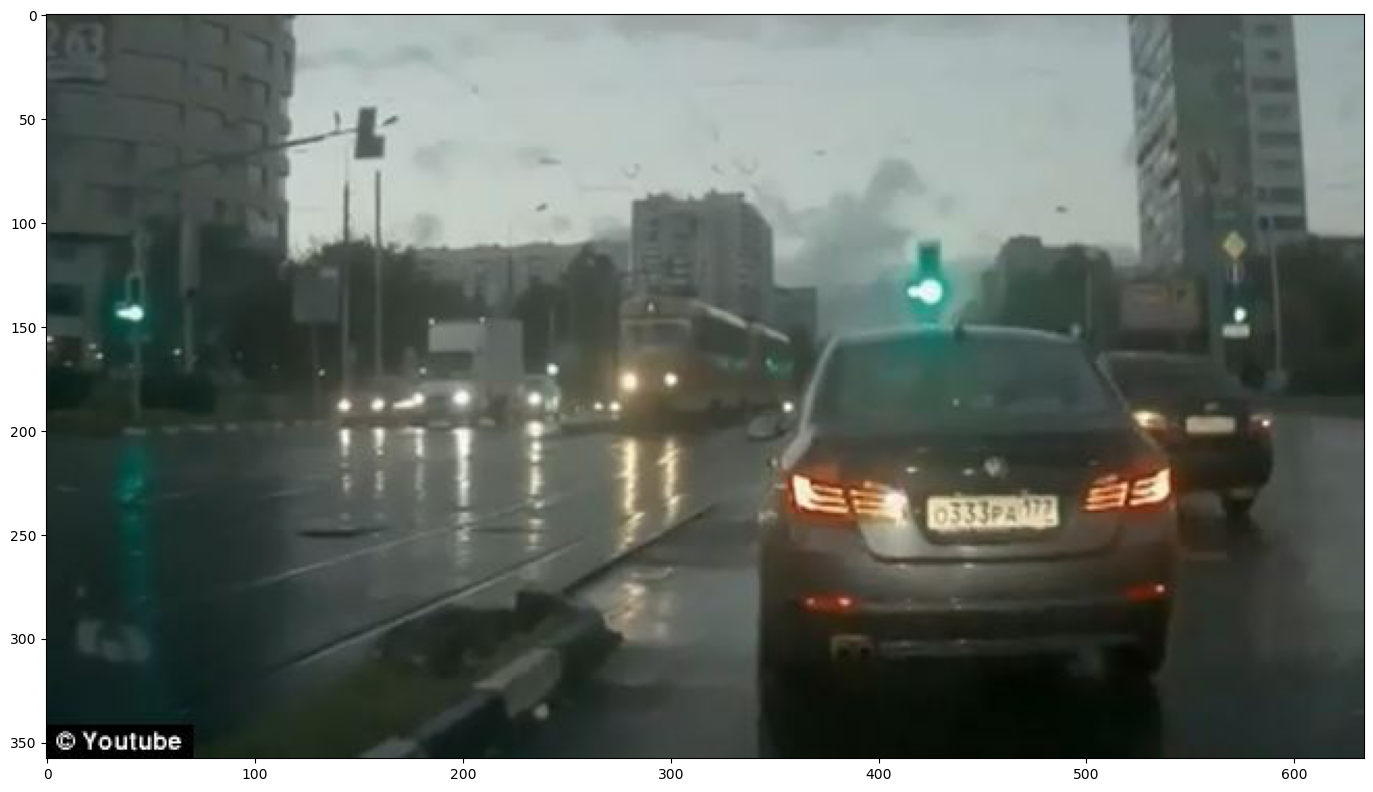

In [9]:
display(img)

In [10]:
plate_cascade=cv2.CascadeClassifier('haarcascade_licence_plate_rus_16stages.xml')

In [16]:
def detect_plate(img):
    
    plate_img=img.copy()
    plate_rect=plate_cascade.detectMultiScale(plate_img)

    for (x,y,w,h) in plate_rect:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),3)

    return plate_img

In [17]:
result = detect_plate(img)

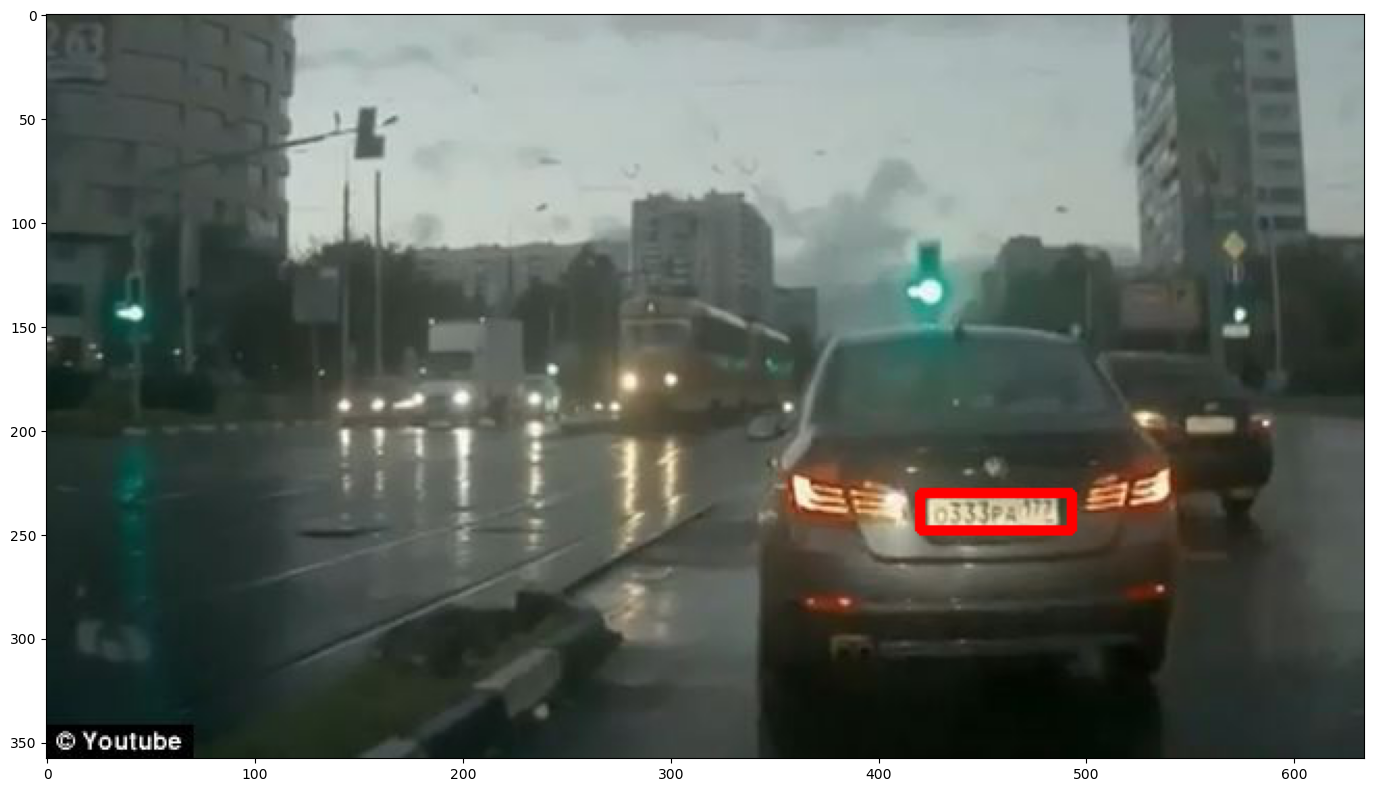

In [18]:
display(result)

In [23]:
def detect_and_blur_plate(img):
    plate_img=img.copy()
    roi=img.copy()
    plate_rect=plate_cascade.detectMultiScale(plate_img)

    for (x,y,w,h) in plate_rect:
        roi=roi[y:y+h,x:x+w]
        blur_roi=cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w]=blur_roi

    return plate_img

In [24]:
result = detect_and_blur_plate(img)

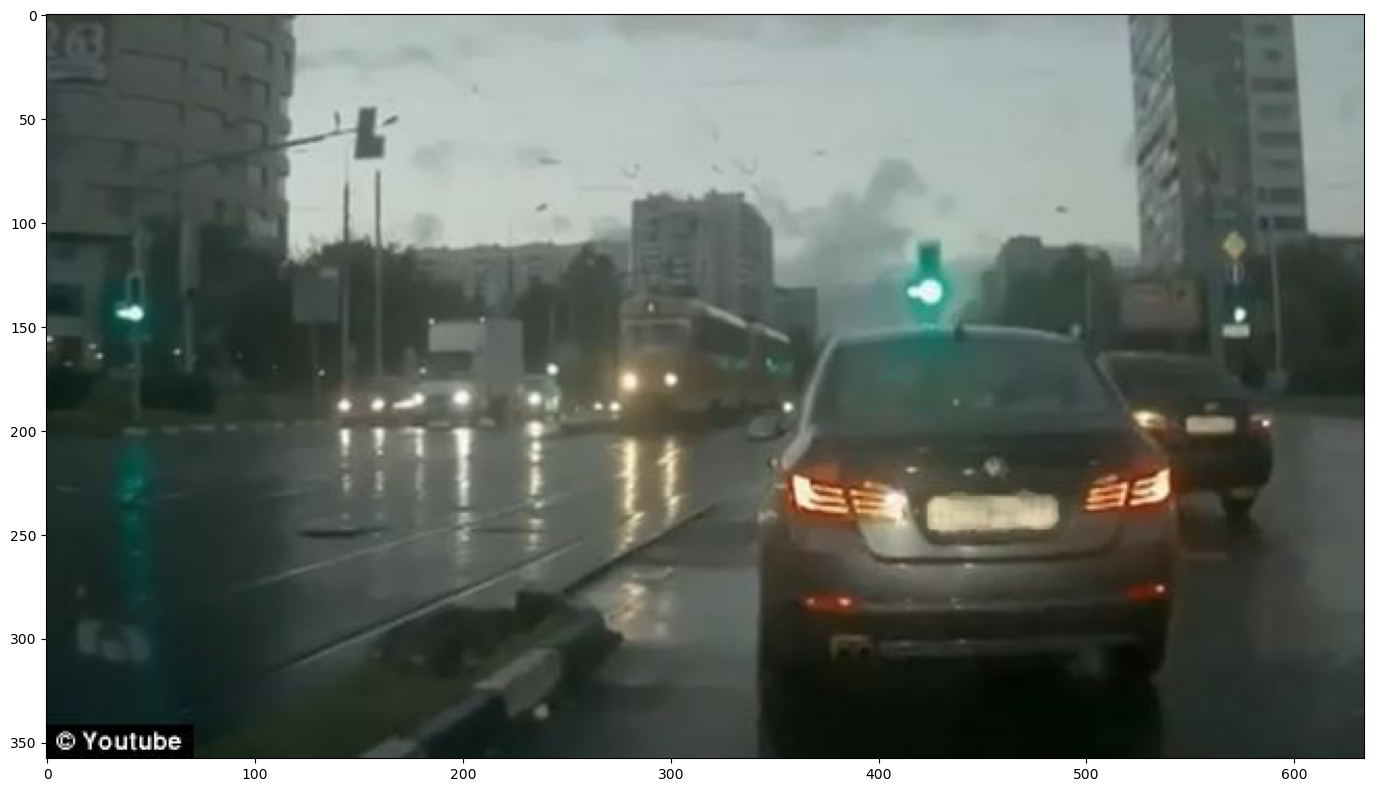

In [25]:
display(result)